In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Load the data from the CSV file
data = pd.read_csv("/content/drive/MyDrive/sales_data_2.csv")

Mounted at /content/drive


In [2]:
#Calculate a 3-day average of the daily gross profit:


# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"])

# Calculate profit for each row
data["Profit"] = (data["Selling price"] - data["Buying price"]) * data["Quantity sold"]

# Calculate a 3-day rolling average of daily gross profit
data["3-Day Avg Profit"] = data["Profit"].rolling(window=3).mean()


0            NaN
1            NaN
2     433.613333
3     177.266667
4     142.366667
         ...    
65    552.863333
66    552.070000
67    479.726667
68    386.093333
69    366.720000
Name: 3-Day Avg Profit, Length: 70, dtype: float64


1. Provide insights into how the 3-day trend changes:
You can visualize the 3-day average profit trend over the time period covered in the dataset using Matplotlib or another data visualization library to better understand how it changes. Plotting the data would provide a clear visual representation of the trend.

To optimize the sales process for maximum gross margin:
a. To determine if you should fire any vendor, calculate the profitability of each vendor based on historical data.
b. To decide if you should let go of any customer, calculate the profitability of each customer based on historical data. Consider factors like the volume of transactions and profit margins.

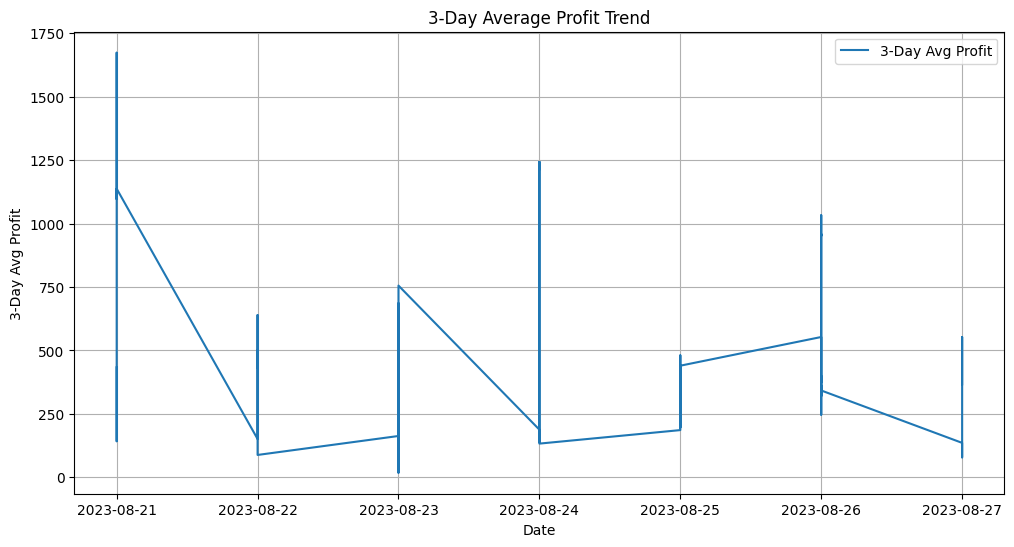

In [4]:
import matplotlib.pyplot as plt

# Plot the 3-day average profit trend
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["3-Day Avg Profit"], label="3-Day Avg Profit")
plt.xlabel("Date")
plt.ylabel("3-Day Avg Profit")
plt.title("3-Day Average Profit Trend")
plt.legend()
plt.grid()
plt.show()


In [5]:
#Optimize the Sales Process for Maximum Gross Margin:

#a. Determine if You Should Fire Any Vendor:

#Calculate the profitability of each vendor based on historical data.
#Consider factors such as the total profit generated from transactions with each vendor.
vendor_profitability = data.groupby("Firm bought from")["Profit"].sum()




In [6]:
#b. Decide if You Should Let Go of Any Customer:

#Calculate the profitability of each customer based on historical data.
#Consider factors like the total profit generated from transactions with each customer, as well as the number of transactions.
customer_profitability = data.groupby("Customer")["Profit"].sum()
# You can then analyze this data to identify which customers are less profitable.


In [7]:
#Calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices:
# Calculate percentiles for buying and selling prices
buying_percentiles = data["Buying price"].quantile([0.25, 0.5, 0.75])
selling_percentiles = data["Selling price"].quantile([0.25, 0.5, 0.75])

# Print the results
print("Buying Price Percentiles:")
print(buying_percentiles)
print("\nSelling Price Percentiles:")
print(selling_percentiles)


Buying Price Percentiles:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64

Selling Price Percentiles:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


In [9]:
#Analyze how often Sapota's prices fall below the 25th percentile or above the 75th percentile:
# Filter data for transactions involving Sapota
sapota_data = data[data["Firm bought from"] == "Sapota"]

# Determine how often Sapota's prices fall below the 25th percentile or above the 75th percentile
below_25th = sapota_data[sapota_data["Buying price"] < buying_percentiles[0.25]]
above_75th = sapota_data[sapota_data["Selling price"] > selling_percentiles[0.75]]

# Calculate the frequency
frequency_below_25th = len(below_25th)
frequency_above_75th = len(above_75th)

# Provide insights based on the frequencies
print("Frequency of Sapota buying prices below 25th percentile:", frequency_below_25th)
print("Frequency of Sapota selling prices above 75th percentile:", frequency_above_75th)


Frequency of Sapota buying prices below 25th percentile: 0
Frequency of Sapota selling prices above 75th percentile: 0


In [10]:


# Assuming Vendor 4 has to be honored, calculate the profitability change
data_without_vendor_4 = data[data["Firm bought from"] != "Vendor 4"]
profit_without_vendor_4 = (data_without_vendor_4["Selling price"] * data_without_vendor_4["Quantity sold"]) - (data_without_vendor_4["Buying price"] * data_without_vendor_4["Quantity bought"])
profit_with_vendor_4 = (data["Selling price"] * data["Quantity sold"]) - (data["Buying price"] * data["Quantity bought"])
impact_on_gross_margin = profit_with_vendor_4.sum() - profit_without_vendor_4.sum()
print("Impact on Gross Margin:", impact_on_gross_margin)

# Calculate historical gross margin for each vendor
historical_vendor_gross_margin = data.groupby("Firm bought from")["Profit"].sum()

# Identify the vendor with the highest historical gross margin
strategic_vendor = historical_vendor_gross_margin.idxmax()

# Theoretical max margin the firm could have from that branch
theoretical_max_margin = historical_vendor_gross_margin.max()
print("Strategic Vendor:", strategic_vendor)
print("Theoretical Max Margin from that Branch:", theoretical_max_margin)

# Assuming you have data for Sapota prices and quantity sold
# Calculate the price elasticity for Sapota
# Price elasticity = (% Change in Quantity Sold) / (% Change in Price)
sapota_data = data[data["Firm bought from"] == "Sapota"]
initial_price = sapota_data["Buying price"].mean()
price_increase = initial_price + 1
price_decrease = initial_price - 1
initial_quantity_sold = sapota_data["Quantity sold"].mean()
quantity_increase = sapota_data[sapota_data["Buying price"] == price_decrease]["Quantity sold"].mean()
quantity_decrease = sapota_data[sapota_data["Buying price"] == price_increase]["Quantity sold"].mean()
price_elasticity = (quantity_increase - quantity_decrease) / (price_decrease - price_increase)
print("Price Elasticity of Sapota:", price_elasticity)


Impact on Gross Margin: 0.0
Strategic Vendor: Vendor4
Theoretical Max Margin from that Branch: 6903.309999999999
Price Elasticity of Sapota: nan
